In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import string
import spacy
import os 
import collections
from collections import Counter
from gensim.models.word2vec import Word2Vec
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import spacy
os.chdir('C:/Users/kmche/Desktop/UCI MSBA/BANA 275 - NLP')
os.getcwd()

'C:\\Users\\kmche\\Desktop\\UCI MSBA\\BANA 275 - NLP'

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Here are the links to load in data
https://www.kaggle.com/andrewmvd/data-analyst-jobs
<br> https://www.kaggle.com/jobspikr/data-scientist-job-postings-from-the-usa 

In [3]:
# First link
ba = pd.read_csv("C:/Users/kmche/Desktop/UCI MSBA/BANA 275 - NLP/BusinessAnalyst.csv")
da = pd.read_csv("C:/Users/kmche/Desktop/UCI MSBA/BANA 275 - NLP/DataAnalyst.csv")
de = pd.read_csv("C:/Users/kmche/Desktop/UCI MSBA/BANA 275 - NLP/DataEngineer.csv")
ds = pd.read_csv("C:/Users/kmche/Desktop/UCI MSBA/BANA 275 - NLP/DataScientist.csv")
# Second link
ds10k = pd.read_csv("C:/Users/kmche/Desktop/UCI MSBA/BANA 275 - NLP/data_scientist_united_states_job_postings_jobspikr.csv")

In [4]:
# Creating column for their sources
ba['source'] = 'ba'
da['source'] = 'da'
de['source'] = 'de'
ds['source'] = 'ds'
ds10k['source'] = 'ds'

In [5]:
# these rows don't have job title 
print(len(ba[ba['Rating'] == 'Jacksonville, FL']))
print(len(ba[ba['Rating'] == 'Ponte Vedra Beach, FL']))
print(len(ba[ba['Rating'] == 'Orange Park, FL']))
print(len(ba[ba['Rating'] == 'Mayport, FL']))
print(len(ba[ba['Rating'] == 'Jacksonville Beach, FL']))
print(len(ba[ba['Rating'] == 'Fleming Island, FL']))

392
1
4
1
1
1


In [6]:
# Removing 400 rows that don't have job title 
ba = ba[(ba['Rating'] != 'Jacksonville, FL') & 
        (ba['Rating'] != 'Ponte Vedra Beach, FL') &
        (ba['Rating'] != 'Orange Park, FL') &
        (ba['Rating'] != 'Mayport, FL') &
        (ba['Rating'] != 'Jacksonville Beach, FL') &
        (ba['Rating'] != 'Fleming Island, FL')]

In [7]:
print(ba.columns)
print(da.columns)
print(de.columns)
print(ds.columns)

Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply', 'source'],
      dtype='object')
Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'source'],
      dtype='object')
Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'source'],
      dtype='object')
Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'F

In [8]:
# dropping unnecessary columns
ba = ba.drop(['Unnamed: 0', 'index'], axis = 1)
da = da.drop(['Unnamed: 0'], axis = 1)
ds = ds.drop(['Unnamed: 0', 'index'], axis = 1)

In [9]:
print(ba.columns)
print(da.columns)
print(de.columns)
print(ds.columns)

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'source'],
      dtype='object')
Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'source'],
      dtype='object')
Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'source'],
      dtype='object')
Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue

In [555]:
data.columns

Index(['job_title', 'salary_est', 'job_desc', 'company', 'location', 'city',
       'state', 'source', 'salary_low', 'salary_high', 'salary_mean',
       'salary_range', 'job_title_token', 'job_title_clean', 'level', 'role',
       'job_desc_token', 'job_desc_clean', 'job_desc_stem', 'job_desc_spacy',
       'job_desc_bigrams', 'spacy_tokens', 'dm_skill', 'uni_bi'],
      dtype='object')

In [10]:
# combining all data from first link 
frames = [ba, da, de, ds]
result = pd.concat(frames, axis = 0, ignore_index = True)

In [11]:
# Separating location to city and state columns
result['state'] = result['Location'].agg(lambda x: x[-2:])
result['city'] = result['Location'].agg(lambda x: x[:-4])

In [12]:
# Combining city and state columns for second link, separated by comma 
ds10k['location'] = ds10k[['city', 'state']].apply(lambda x: ', '.join(x[x.notnull()]), axis=1)

In [13]:
# Extracting intersecting columns 
result_sub = result[['Job Title', 'Salary Estimate', 'Job Description', 'Company Name', 'Location', 'city', 'state', 'source']]
# Renaming columns for same name 
result_sub.columns = ['job_title', 'salary_est','job_desc', 'company', 'location', 'city', 'state', 'source']

In [14]:
# Extracting intersecting columns 
ds10k_sub = ds10k[['job_title', 'salary_offered', 'job_description', 'company_name', 'location', 'city', 'state', 'source']]
# Renaming columns for same name 
ds10k_sub.columns = ['job_title', 'salary_est', 'job_desc', 'company', 'location', 'city', 'state', 'source']

In [15]:
# Add 4 columns based on "salary_est"
result_sub['salary_low'] = result_sub["salary_est"].str.extractall(r"[$](\d+)").xs(0, level='match')
result_sub['salary_high'] = result_sub["salary_est"].str.extractall(r"[$](\d+)").xs(1, level='match')
# WILL NEED TO REPLACE -1 WITH THE MEAN OF EACH JOB TITLE?
result_sub.fillna(-1,inplace=True)
result_sub['salary_low'] = result_sub['salary_low'].astype(int)
result_sub["salary_high"] = result_sub["salary_high"].astype(int)
result_sub['salary_mean'] = (result_sub["salary_high"] + result_sub['salary_low'])/2
result_sub['salary_range'] = result_sub["salary_high"] - result_sub['salary_low']

In [16]:
ds10k_sub['salary_est'].isnull().sum()

9403

In [17]:
ds10k_sub['salary_est'].unique()

array([nan, 'Salary Range: \xa0\xa0\xa0Undisclosed',
       '$120000 - $140000 per annum + Package', '$80K - $100K',
       '$100K - $150K', '$150K - $200K', '$200K - $250K', '$120K - $140K',
       '$100K - $230K', '$90K - $150K', '$200K - $2147484K',
       '$50k - 75k | Equity', '$100k - 135k | Equity', 'Negotiable',
       '$130K - $150K', '$85k - 97k | Equity', '$150k - 175k | Equity',
       '$100,000 - $140,000 a year', '$250K - $500K', '$80K - $150K',
       '$200K - $220K'], dtype=object)

In [18]:
# Cleaning the salary 
ds10k_sub['salary_est'] = ds10k_sub['salary_est'].str.replace('$', '')
ds10k_sub['salary_est'] = ds10k_sub['salary_est'].str.replace(',', '')
ds10k_sub['salary_est'] = ds10k_sub['salary_est'].str.replace('\s\w+\s\w+\s\+\s\w+', '')
ds10k_sub['salary_est'] = ds10k_sub['salary_est'].str.replace('\s\|\s\w+', '')
ds10k_sub['salary_est'] = ds10k_sub['salary_est'].str.replace('\sa\s\w+', '')
ds10k_sub['salary_est'] = ds10k_sub['salary_est'].str.replace('Negotiable', '')
ds10k_sub['salary_est'] = ds10k_sub['salary_est'].str.replace('Salary Range: \xa0\xa0\xa0Undisclosed', '')
ds10k_sub['salary_est'] = ds10k_sub['salary_est'].str.replace('200K - 2147484K', '')
ds10k_sub['salary_est'] = ds10k_sub['salary_est'].str.replace('000', '')

In [19]:
# Add 4 columns based on "salary_est"
ds10k_sub['salary_low'] = ds10k_sub["salary_est"].str.extractall(r"(\d+)").xs(0, level='match')
ds10k_sub['salary_high'] = ds10k_sub["salary_est"].str.extractall(r"(\d+)").xs(1, level='match')
# WILL NEED TO REPLACE -1 WITH THE MEAN OF EACH JOB TITLE?
ds10k_sub.fillna(-1,inplace=True)
ds10k_sub['salary_low'] = ds10k_sub['salary_low'].astype(int)
ds10k_sub["salary_high"] = ds10k_sub["salary_high"].astype(int)
ds10k_sub['salary_mean'] = (ds10k_sub["salary_high"] + ds10k_sub['salary_low'])/2
ds10k_sub['salary_range'] = ds10k_sub["salary_high"] - ds10k_sub['salary_low']

In [20]:
ds10k_sub['salary_est'].unique()

array([-1, '', '120 - 140', '80K - 100K', '100K - 150K', '150K - 200K',
       '200K - 250K', '120K - 140K', '100K - 230K', '90K - 150K',
       '50k - 75k', '100k - 135k', '130K - 150K', '85k - 97k',
       '150k - 175k', '100 - 140', '250K - 500K', '80K - 150K',
       '200K - 220K'], dtype=object)

In [21]:
combined = [result_sub, ds10k_sub]
data = pd.concat(combined, axis = 0, ignore_index = True)

In [23]:
# Cleaning state column
data['state'] = data.state.str.replace(r'\d', '')
data['state'] = data.state.str.replace(r'\(.*\)', '')
data['state'] = data.state.str.replace(r'Virginia', 'VA')
data['state'] = data.state.str.replace(r'New Mexico', 'NM').replace(r'New Jersey', 'NJ').replace(r'Idaho', 'ID').replace(r'Massachusetts', 'MA').replace(r'Louisiana', 'LA').replace(r'Hawaii', 'HI').replace(r'Washington State', 'WA')
data['state'] = data.state.str.replace(r'\s*', '')
data['state'] = data.state.str.replace(r'\-', '')
data['state'] = data.state.str.replace(r'(Computerorinternet|Remote|WorkatHome)', 'WFH')
data['state'] = data.state.str.replace(r'(NN|om)', 'UK')
data['state'] = data.state.str.replace(r'Engineeringorarchitecture', 'TX')

In [24]:
# Removing the '/n' from company name
data['company'] = data['company'].str.split('\n',expand=True)[0]

In [25]:
data.shape

(22382, 12)

In [26]:
# dropped duplicates
data = data.drop_duplicates(keep = 'first')
data.shape

(21301, 12)

In [27]:
# Lower casing job title 
data['job_title'] = data.job_title.str.lower()

In [29]:
# Use this to remove unwanted in job titles
stop_words = stopwords.words('english')
to_remove = stop_words + list(string.punctuation) + list(string.digits)
to_remove  

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
# tokenizing job title and removing stopwords/digits/punctuation 
data['job_title_token'] = data['job_title'].apply(word_tokenize).apply(lambda x: [item for item in x if item not in to_remove])


In [31]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
# combining tokens back into cleaned text 
data['job_title_clean'] = data['job_title_token'].apply(TreebankWordDetokenizer().detokenize)

In [32]:
# removing unwanted punctuation that were not separated by space - random ex. salary/hourly, high-five
data['job_title_clean'] = data['job_title_clean'].str.replace('/', ' ')
data['job_title_clean'] = data['job_title_clean'].str.replace('-', ' ')
data['job_title_clean'] = data['job_title_clean'].str.replace('.', ' ')

In [33]:
# extracing job level
data['level'] = data['job_title_clean'].str.extract('(vice president|vp|senior|junior|principal|president|staff|associate|sr|jr|director|chief|manager|lead|iii|ii|entry)')

In [34]:
# Creating levels for different levels 
data['level'] = data['level'].replace("(vice president|vp)", 'exec', regex = True)
data['level'] = data['level'].replace("(chief|director)", 'head', regex = True)
data['level'] = data['level'].replace("(lead|principal|manager)", 'lead', regex = True)
data['level'] = data['level'].replace("(senior|iii|sr)", 'senior', regex = True)
data['level'] = data['level'].replace("(associate|ii|sr|staff)", 'mid', regex = True)
data['level'] = data['level'].replace("(junior|jr|entry)", 'junior', regex = True)
data.level.fillna('none', inplace = True)

In [35]:
# extractcing general positions
data['role'] = data['job_title_clean'].str.extract('(data scientist|data engineer|business analyst|data analyst|analyst|data science|manager|scientist|analysis|consultant|machine learning engineer|architect|analytics|software engineer|big data|engineer|researcher|data|research)')

In [661]:
pd.DataFrame(data.role.value_counts())

,role
data scientist,9545
data analyst,2682
analyst,1752
data engineer,1711
business analyst,1688
data,816
engineer,794
scientist,590
software engineer,333
big data,321


In [259]:
print(len(data[data['role'].isnull()]))
print(data.shape)

,job_title,salary_est,job_desc,company,location,city,state,source,salary_low,salary_high,...,job_title_token,job_title_clean,level,role,job_desc_token,job_desc_clean,job_desc_stem,job_desc_spacy,job_desc_bigrams,spacy_tokens


In [42]:
# Removing rows from role is null because these are not informative such as 'business intelligence' or 'services'
data = data.dropna(subset=['role'])
data.shape

(21265, 16)

In [50]:
data[data.salary_mean == -1].value_counts('role')

role
data scientist               8007
research                       66
manager                        40
analytics                      38
data analyst                   37
engineer                       36
data                           28
big data                       27
analyst                        23
machine learning engineer      14
software engineer              12
data engineer                  10
consultant                      8
architect                       5
data science                    4
business analyst                4
researcher                      4
analysis                        2
scientist                       1
dtype: int64

In [45]:
data[(data.role == 'analytics') & (data.salary_mean == -1)].value_counts('level')

level
none      21
senior    11
lead       6
dtype: int64

In [53]:
jobs = data[data.salary_mean == -1].role.unique().tolist()
rank = data[data.salary_mean == -1].level.unique().tolist()

# replacing any Salary with -1 with the average salary of respective role and level
for i in jobs:
    for j in rank: 
        data['salary_mean'].mask(((data['salary_mean'] == -1) & (data['role'] == i) & (data['level'] == j)), data[(data['role'] == i) & (data['salary_mean'] != -1 ) & (data['level'] == j)].salary_mean.mean(), inplace=True)


In [56]:
# Cleaning job description
data['job_desc'] = data['job_desc'].str.lower()
data['job_desc'] = data['job_desc'].str.replace('\\n',' ')
data['job_desc'] = data['job_desc'].str.replace('http\S+|www\S+|https\S+','')
data['job_desc'] = data['job_desc'].str.replace('\S+@\S+\.\S+','')

In [57]:
# Use this to remove unwanted in job description, kept digits 
stop_words = stopwords.words('english')
to_remove2 = stop_words + list(string.punctuation)

In [58]:
data['job_desc_token'] = data['job_desc'].apply(word_tokenize).apply(lambda x: [item for item in x if item not in to_remove2])

In [59]:
data['job_desc_clean'] = data['job_desc_token'].apply(TreebankWordDetokenizer().detokenize)

# Comparing Stemming with Lemmatization 
### WordNet and Spacy for Lemmatization (Spacy seems better) 

In [78]:
stemmer = PorterStemmer()
data['job_desc_stem'] = data['job_desc_token'].apply(lambda x: [stemmer.stem(y) for y in x])
data

,job_title,salary_est,job_desc,company,location,city,state,source,salary_low,salary_high,salary_mean,salary_range,job_title_token,job_title_clean,level,role,job_desc_token,job_desc_clean,job_desc_stem
0,business analyst - clinical & logistics platform,$56K-$102K (Glassdoor est.),company overview at memorial sloan kettering...,Memorial Sloan-Kettering,"New York, NY",New York,NY,ba,56,102,79.000000,46,"[business, analyst, clinical, logistics, platf...",business analyst clinical logistics platform,none,business analyst,"[company, overview, memorial, sloan, kettering...",company overview memorial sloan kettering msk ...,"[compani, overview, memori, sloan, ketter, msk..."
1,business analyst,$56K-$102K (Glassdoor est.),we are seeking for an energetic and collaborat...,Paine Schwartz Partners,"New York, NY",New York,NY,ba,56,102,79.000000,46,"[business, analyst]",business analyst,none,business analyst,"[seeking, energetic, collaborative, analyst, e...",seeking energetic collaborative analyst experi...,"[seek, energet, collabor, analyst, experi, pas..."
2,data analyst,$56K-$102K (Glassdoor est.),"for more than a decade, asembia has been worki...",Asembia,"Florham Park, NJ",Florham Park,NJ,ba,56,102,79.000000,46,"[data, analyst]",data analyst,none,data analyst,"[decade, asembia, working, specialty, pharmaci...",decade asembia working specialty pharmacies ma...,"[decad, asembia, work, specialti, pharmaci, ma..."
3,"information security analyst, incident response",$56K-$102K (Glassdoor est.),job description summary the information securi...,BD,"Franklin Lakes, NJ",Franklin Lakes,NJ,ba,56,102,79.000000,46,"[information, security, analyst, incident, res...",information security analyst incident response,none,analyst,"[job, description, summary, information, secur...",job description summary information security a...,"[job, descript, summari, inform, secur, analys..."
4,analyst - fp&a global revenue,$56K-$102K (Glassdoor est.),magnite is the world's largest independent sel...,Rubicon Project,"New York, NY",New York,NY,ba,56,102,79.000000,46,"[analyst, fp, global, revenue]",analyst fp global revenue,none,analyst,"[magnite, world, 's, largest, independent, sel...",magnite world's largest independent sell-side ...,"[magnit, world, 's, largest, independ, sell-si..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22370,ux data scientist w/python for r&d design cent...,-1,summary as the data scientist on the experie...,OSI Engineering,"San Francisco, CA",San Francisco,CA,ds,-1,-1,115.986348,0,"[ux, data, scientist, w/python, r, design, cen...",ux data scientist w python r design center san...,none,data scientist,"[summary, data, scientist, experience, researc...",summary data scientist experience research tea...,"[summari, data, scientist, experi, research, t..."
22371,data scientist,-1,job description: the data scientist within th...,Echo Global Logistics,"Computer-or-internet, Computer-or-internet",Computer-or-internet,WFH,ds,-1,-1,115.986348,0,"[data, scientist]",data scientist,none,data scientist,"[job, description, data, scientist, within, st...",job description data scientist within strategi...,"[job, descript, data, scientist, within, strat..."
22372,data scientist,-1,job description our advanced data analytics d...,"Metron, Inc.","Computer-or-internet, Computer-or-internet",Computer-or-internet,WFH,ds,-1,-1,115.986348,0,"[data, scientist]",data scientist,none,data scientist,"[job, description, advanced, data, analytics, ...",job description advanced data analytics divisi...,"[job, descript, advanc, data, analyt, divis, r..."
22374,geology/geo-data scientist,-1,organization national energy technology labo...,"Albany, OR","Albany, OR",Albany,OR,ds,-1,-1,115.986348,0,"[geology/geo-data, scientist]",geology geo data scientist,none,data scientist,"[organization, national, energy, technology, l...",organization national energy technology labora...,"[organ, nation, energi, technolog, laboratori,..."


In [79]:
wnl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kmche\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [80]:
# Wordnet not that good
list1 = data['job_desc_token'][2]

for words in list1:
    print(words + "-->" + wnl.lemmatize(words))

decade-->decade
asembia-->asembia
working-->working
specialty-->specialty
pharmacies-->pharmacy
manufacturers-->manufacturer
prescribers-->prescribers
payers-->payer
industry-->industry
stakeholders-->stakeholder
develop-->develop
solutions-->solution
high-touch-->high-touch
specialty-->specialty
pharmaceutical-->pharmaceutical
service-->service
model.through-->model.through
collaborative-->collaborative
programs-->program
contracting-->contracting
initiatives-->initiative
patient-->patient
support-->support
hub-->hub
services-->service
innovative-->innovative
technology-->technology
platforms-->platform
asembia-->asembia
committed-->committed
positively-->positively
impacting-->impacting
patient-->patient
journey-->journey
asembia-->asembia
focuses-->focus
specialty-->specialty
pharmacy-->pharmacy
segment-->segment
offers-->offer
comprehensive-->comprehensive
hub-->hub
services-->service
pharmacy-->pharmacy
network-->network
management-->management
group-->group
purchasing-->purchasin

In [81]:
# Spacy for lemmatization 

nlp = spacy.load('en_core_web_sm')

In [82]:
# Spacy lemmatize
data["job_desc_spacy"] = data['job_desc_clean'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))

In [83]:
# Comparing original with stem and lemma
data[['job_desc_clean', 'job_desc_stem', 'job_desc_spacy']].head()

,job_desc_clean,job_desc_stem,job_desc_spacy
0,company overview memorial sloan kettering msk ...,"[compani, overview, memori, sloan, ketter, msk...",company overview memorial sloan kettering msk ...
1,seeking energetic collaborative analyst experi...,"[seek, energet, collabor, analyst, experi, pas...",seek energetic collaborative analyst experienc...
2,decade asembia working specialty pharmacies ma...,"[decad, asembia, work, specialti, pharmaci, ma...",decade asembia work specialty pharmacy manufac...
3,job description summary information security a...,"[job, descript, summari, inform, secur, analys...",job description summary information security a...
4,magnite world's largest independent sell-side ...,"[magnit, world, 's, largest, independ, sell-si...",magnite world 's large independent sell - side...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Word2Vec for custom lists

In [84]:
# job tokens
sent_train = data.job_desc_token.values.tolist()

In [85]:
# training model on job desc tokens 
model = Word2Vec(sent_train, sg = 1)

In [86]:
# creating a column of bigram tokens for custom lists 
data['job_desc_bigrams'] = data['job_desc_clean'].apply(lambda row: list(nltk.ngrams(row.split(" "), 2)))
bi_list = data.job_desc_bigrams.values.tolist()

In [512]:
model.wv.most_similar(['sql'])

[('t-sql', 0.8454033136367798),
 ('sas/r', 0.8359773755073547),
 ('sparksql', 0.8231843709945679),
 ('terradata', 0.8166038393974304),
 ('python', 0.8138742446899414),
 ('sql/relational', 0.8120959401130676),
 ('ssrs/ssis/ssas', 0.809596836566925),
 ('tools/environments', 0.806287944316864),
 ('tsql', 0.8053796887397766),
 ('cypher', 0.8042747974395752)]

In [654]:
model.wv.most_similar(['tableau'])

[('spotfire', 0.8686467409133911),
 ('domo', 0.8598577976226807),
 ('qlikview', 0.8483279347419739),
 ('qlik', 0.8464677333831787),
 ('chartio', 0.8458862900733948),
 ('rshiny', 0.8401879668235779),
 ('sisense', 0.8363835215568542),
 ('metabase', 0.8339745402336121),
 ('visualization/reporting', 0.8300536870956421),
 ('powerbi', 0.8299016356468201)]

In [591]:
model.wv.most_similar(['python'])

[('r', 0.9134997725486755),
 ('java', 0.882867157459259),
 ('scala', 0.8808922171592712),
 ('matlab', 0.841879665851593),
 ('c++/c', 0.8336421251296997),
 ('r/', 0.8318164944648743),
 ('python/numpy', 0.8291577100753784),
 ('python/jupyter', 0.8220095038414001),
 ('python/pandas', 0.8212622404098511),
 ('idl', 0.8207764029502869)]

In [655]:
model.wv.similarity('python', 'r')

0.9134997

In [542]:
# Custom lists extracted from W2V 
programming = ['python', 'r', 'c++', 'java', 'c', 'matlab', 'sas', 'spss', 'stata']
visualization = ['chartio', 'tableau', 'looker', 'powerbi', 'visualization', 'story-telling',
                'spotfire', 'rshiny', 'qlikview', 'domo', 'webfocus', 'qlik']
data_eg = ['agile','aws','bigquery','bigsql','cassandra','docker','dockering','hadoop','hbase','hdfs','hive','hivesql',
           'kubernetes','mongodb','mysql','nosql','pig','pyspark','s3','scala','spark','sparksql','sql','teradata']
python = ['scipy', 'pandas', 'sklearn', 'statsmodels', 'scikit-learn', 'geopandas', 'pybrain', 'scikitlearn', 'numpy', 'matplotlib']
education = ['phd', 'ph.d.', 'doctorate', 'masters', 'master', 'ms', 'm.s.', 'bachelor', 'bachelors', 'bs', 'b.s.']
experience = ['1+', '2+', '3+', '4+', '5+', '6+', '7+', '8+', '9+', '10+', '2-5+', '3-5+', '3-5', '2-5','5-7','6-8+','4-6', '8-10+', '2-4+']
ml = [('machine','learning'), ('predictive', 'modeling'), ('linear', 'regression'), ('logistic', 'regression'), ('k','means'), ('random', 'forest'), ('naive', 'bayes'), ('pca', 'svd'), ('decision', 'tree'), ('ensemble', 'model')]
dl = [('neural','network'), ('deep', 'learning'), ('object', 'detection'), ('keras', 'tensorflow'), ('convolutional', 'neural'), ('tensorflow', 'keras')]
softskill = ['communication', 'interpersonal', 'verbal', 'written', 'oral', 'inter-personal', 'cross-functional',
            'cross-organizational', 'multi-functional', 'teamwork', 'collaboration']
#nlp_bigrams = [('natural', 'language'), ('topic', 'modeling'), ('pos', 'tagging'), ('word', 'embedding'), ('sentiment', 'analysis'), ('speech', 'recognition')]
#nlp_unigrams = ['nlp', 'lda', 'nmf', 'nltk', 'genism', 'spacy', 'word2vec', 'doc2vec']
#international = ['sponsorship', 'visa', 'h-1b', 'h1-b', 'h1b', 'sponsorships', 'visas', 'opt', 'sponsor', 'unfortunately',
                #'nonimmigrant', 'aliens', 'nationals', 'l-1', 'greencard']

In [528]:
# Just business analysts 
baba = data[data['source'] == 'ba']

In [534]:
# Just data engineer
dede = data[data['source'] == 'de']

In [549]:
# Example of count for Data Engineering for deep learning bigrams 
ed = []
for i in dede['job_desc_bigrams']:
    for j in i:
        if j in dl:
            ed.append(j)
collections.Counter(ed).most_common()

[(('deep', 'learning'), 106),
 (('tensorflow', 'keras'), 14),
 (('neural', 'network'), 8),
 (('convolutional', 'neural'), 4),
 (('object', 'detection'), 3),
 (('keras', 'tensorflow'), 1)]

In [653]:
# Example of count for Business Analysts for programming custom list
ed = []
for i in baba['job_desc_token']:
    for j in i:
        if j in programming:
            ed.append(j)
collections.Counter(ed).most_common()

[('python', 338),
 ('r', 240),
 ('sas', 189),
 ('c', 151),
 ('java', 131),
 ('spss', 49),
 ('c++', 27),
 ('matlab', 10),
 ('stata', 10)]

# EDA/VISUALIZATIONS

In [339]:
d = pd.DataFrame(data.state.value_counts().nlargest(10)).reset_index()
e = d['index'].tolist()
d

,index,state
0,CA,5063
1,TX,4601
2,NY,1843
3,IL,1505
4,PA,1149
5,AZ,1015
6,VA,677
7,NJ,561
8,MA,496
9,FL,495


<BarContainer object of 10 artists>

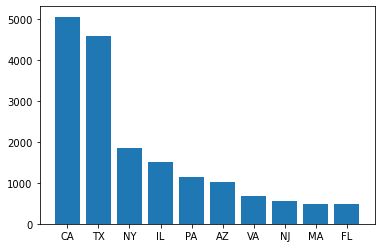

In [342]:
# Distribution of top 10 states counts 
plt.bar(d['index'], d.state)

In [313]:
top10 = data[data['state'].isin(e)]

,job_title,salary_est,job_desc,company,location,city,state,source,salary_low,salary_high,...,job_title_token,job_title_clean,level,role,job_desc_token,job_desc_clean,job_desc_stem,job_desc_spacy,job_desc_bigrams,spacy_tokens
0,business analyst - clinical & logistics platform,$56K-$102K (Glassdoor est.),company overview at memorial sloan kettering...,Memorial Sloan-Kettering,"New York, NY",New York,NY,ba,56,102,...,"[business, analyst, clinical, logistics, platf...",business analyst clinical logistics platform,none,business analyst,"[company, overview, memorial, sloan, kettering...",company overview memorial sloan kettering msk ...,"[compani, overview, memori, sloan, ketter, msk...",company overview memorial sloan kettering msk ...,"[(company, overview), (overview, memorial), (m...","[company, overview, memorial, sloan, kettering..."
1,business analyst,$56K-$102K (Glassdoor est.),we are seeking for an energetic and collaborat...,Paine Schwartz Partners,"New York, NY",New York,NY,ba,56,102,...,"[business, analyst]",business analyst,none,business analyst,"[seeking, energetic, collaborative, analyst, e...",seeking energetic collaborative analyst experi...,"[seek, energet, collabor, analyst, experi, pas...",seek energetic collaborative analyst experienc...,"[(seeking, energetic), (energetic, collaborati...","[seek, energetic, collaborative, analyst, expe..."
2,data analyst,$56K-$102K (Glassdoor est.),"for more than a decade, asembia has been worki...",Asembia,"Florham Park, NJ",Florham Park,NJ,ba,56,102,...,"[data, analyst]",data analyst,none,data analyst,"[decade, asembia, working, specialty, pharmaci...",decade asembia working specialty pharmacies ma...,"[decad, asembia, work, specialti, pharmaci, ma...",decade asembia work specialty pharmacy manufac...,"[(decade, asembia), (asembia, working), (worki...","[decade, asembia, work, specialty, pharmacy, m..."
3,"information security analyst, incident response",$56K-$102K (Glassdoor est.),job description summary the information securi...,BD,"Franklin Lakes, NJ",Franklin Lakes,NJ,ba,56,102,...,"[information, security, analyst, incident, res...",information security analyst incident response,none,analyst,"[job, description, summary, information, secur...",job description summary information security a...,"[job, descript, summari, inform, secur, analys...",job description summary information security a...,"[(job, description), (description, summary), (...","[job, description, summary, information, secur..."
4,analyst - fp&a global revenue,$56K-$102K (Glassdoor est.),magnite is the world's largest independent sel...,Rubicon Project,"New York, NY",New York,NY,ba,56,102,...,"[analyst, fp, global, revenue]",analyst fp global revenue,none,analyst,"[magnite, world, 's, largest, independent, sel...",magnite world's largest independent sell-side ...,"[magnit, world, 's, largest, independ, sell-si...",magnite world 's large independent sell - side...,"[(magnite, world's), (world's, largest), (larg...","[magnite, world, 's, large, independent, sell,..."


In [597]:
avg10 = pd.DataFrame(data.groupby('state')['salary_mean'].mean().sort_values(ascending = False)).reset_index()

In [598]:
avg10

,state,salary_mean
0,NE,122.535359
1,WV,121.631156
2,AR,121.540268
3,KY,120.547948
4,UnitedStates,118.547183
5,MD,117.648241
6,LA,117.556810
7,ID,116.755252
8,IA,116.682981
9,CT,116.324466


<BarContainer object of 10 artists>

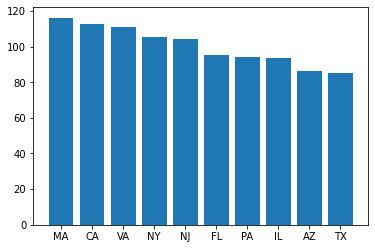

In [354]:
# Average salary for each stsate 
plt.bar(avg10.state, avg10.salary_mean, )

    level  salary_mean
0    exec   161.905797
1    head   136.346154
2    lead   112.555727
3  senior   103.046675
4     mid    99.773069
5    none    99.647535
6  junior    86.146134


<BarContainer object of 7 artists>

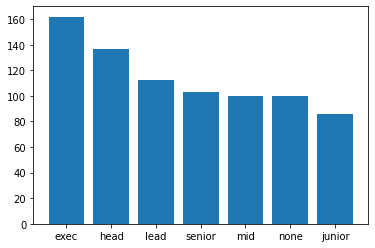

In [362]:
levels = pd.DataFrame(data.groupby('level')['salary_mean'].mean().sort_values(ascending = False).reset_index())
print(levels)
plt.bar(levels.level, levels.salary_mean)
# based on the roles where we were able to extract a title
# salary by levels 

<BarContainer object of 7 artists>

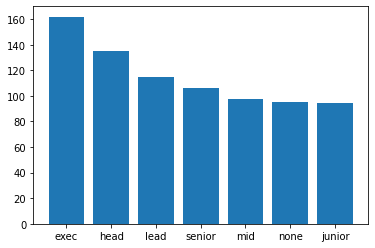

In [474]:
level69 = pd.DataFrame(data.groupby(['level']).sample(n=69))
level_salary_samp = pd.DataFrame(level69.groupby(['level'])['salary_mean'].mean().sort_values(ascending = False).reset_index())
plt.bar(level_salary_samp.level, level_salary_samp.salary_mean)
# About the same disribution as no random sample

In [659]:
# Custom stopwords
stopw = ['available', 'excellent','travel', 'and', 'or' 'vendor', 'approach','analyze', 'integrate', 'analytical',
         'store','find','staff', 'career', 'executiion', 'modern', 'construction', 'around', 'multi', 'translate', 
         'place',  'goal', 'scalable', 'idea', 'expect', 'reliability', 'operating', 'release', 'order', 'directly', 'highly', 
         'prove', 'unit', 'site', 'creative', 'power', 'cross', 'functional', 'serve', 'come', 'device', 'additional', 
         'validation', 'collaboration', 'associate', 'involve', 'brand', 'evaluate', 'identify', 'engage', 'culture', 
         'asset', 'ideal', 'prepare', 'principle','passionate', 'global', 'sale', 'proficiency', 'direct', 'marketing', 
         'specific', 'bring', 'direct', 'necessary', 'appropriate', 'sex', 'applicant', 'individual', 'disability', 
         'affirmatve', 'action', 'healthcare', 'fast', 'pace', 'similar', 'seek', 'large', 'scale', 'leadership', 
         'maintenance', 'idenity', 'solid', 'success', 'function', 'event', 'market', 'passion', 'class', 'us', 'overall', 
         'operational', 'real', 'certification', 'initiative', 'background','external', 'internal', 'configuration', 'digital', 
         'relevant', 'insight', 'financial','distribute', 'establish','effort', 'learn','identity', 'advanced', 'basic', 
         'dental', 'vision', 'solve', 'problem', 'solving', 'delivery', 'operate','current', 'critical', 'execute', 
         'bring' 'applicant', 'receive', 'take', 'core', 'receive', 'consideration','equal', 'employment','mission', 
         'task', 'leader', 'future','access', 'world', 'processing', 'share', 'open', 'department', 'reasonable', 
         'understanding', 'specification', 'challenge', 'deploy', 'hardware', 'conduct', 'least', 'problem', 'united', 
         'state','follow', 'training', 'education', 'office', 'successful', 'stakeholder', 'collaborate', 'improve', 
         'manager', 'troubleshoot', 'establist', 'know', 'leverage', 'procedure', 'coordinate','skill', 'reporting','every', 
         'resource', 'review', 'one', 'analyst', 'web', 'working', 'great', 'candidate', 'deployment', 'participate', 
         'technique', 'utilize','complex', 'area','equipment', 'closely', 'group', 'change', 'enable', 'issue', 'performance', 
         'impact','exist', 'multiple', 'employee', 'feature', 'result', 'senior', 'grow', 'growth', 'identity', 'innovative', 
         'set', 'able', 'key', 'developer', 'groupll', 'intelligence', 'architecture', 'production', 'building', 'testing', 
         'information', 'eg', 'make', 'deliver', 'familiarity', 'qualification', 'component', 'value', 'desire', 'join', 
         'concept', '11', 'end', 'may','without','good','member', 'bachelor', 'plan','part', 'people','capability', 
         'contribute','perform', 'implementation', 'high', 'across', 'want', 'center', 'expert', 'minimum', 'control', 
         'source', 'day', 'documentation', 'decision', 'infrastructure', 'level','devlier', 'document', 'responsibility', 
         'practice', 'network', 'responsible', 'production,', 'look', 'preferred', 'build', 'lead', 'base', 'implement', 
         'analytic', 'integration', 'meet', 'must', 'define','test', 'team', 'design', 'quality', 'user', 'degree', 'various', 
         'activity', 'strategy', 'code','program', 'platform','operation','organization', 'demonstrate','within', 'opeartion', 
         'partner','assist','apply','understand','create', 'tool', 'offer', 'technical', 'knowledge','analysis','professional',
         'race', 'strong', 'prefer', 'regard', 'ability', 'e', 'g', 'role', 'big', 'standard', 'color', 'religion','related', 
         'field', 'report', 'focus', 'relate', 'manage', 'witihin', 'code' 'employee', 'expertise', 'full','time', 'industry', 
         'business', 'plus','require', 'veteran', 'status', 'etc', 'enterprise','position','hand','develop', 'company', 'drive',
         'sexual', 'orientation','new','help','job', 'description','maintain', 'ensure','datum', 'scientist','solution','year',
         'experience', 'project', 'system', 'product', 'support', 'application', 'use', 'technology', 'include', 'well', 
         'service','data', 'engineer', 'opportunity', 'employer','national', 'origin','gender','identity','process','software', 
         'engineering', 'client', 'management', 'need','environment','identity', 'computer', 'science', 'provide','development', 'equal opportunity', 'customer', 
         'national origin', 'sexual orientation', 'race color', 'requirement', 'equal opportunity', 'work']

(-0.5, 399.5, 199.5, -0.5)

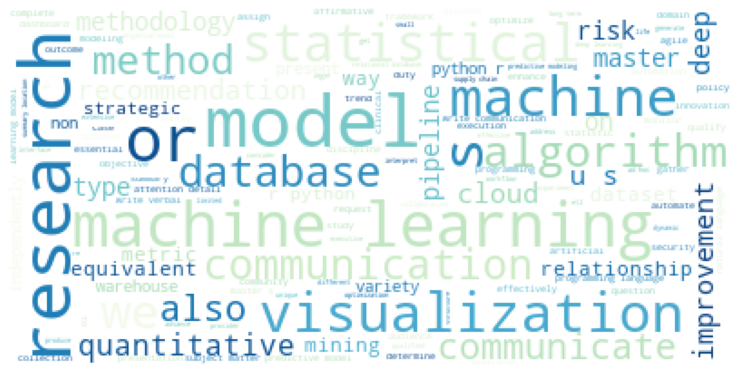

In [600]:
# Word Cloud 
plt.figure(figsize=(13,10))
wc = WordCloud(max_words=2000, stopwords = stopw, max_font_size= 40, background_color = 'white') 
wc_text = data['spacy_tokens'].apply(lambda x: ' '.join(x)).values
wc.generate(' '.join(wc_text))
plt.imshow(wc.recolor( colormap= 'GnBu' , random_state=17), alpha=0.98)
plt.axis('off')

<BarContainer object of 19 artists>

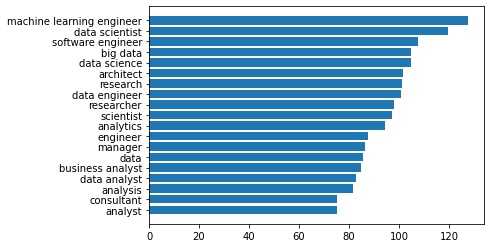

In [467]:
role18 = pd.DataFrame(data.groupby(['role']).sample(n=18))
role_salary_samp = pd.DataFrame(role18.groupby(['role'])['salary_mean'].mean().sort_values(ascending = True).reset_index())
plt.barh(role_salary_samp.role, role_salary_samp.salary_mean)

# Consistently - data scientists, software engineer, ml engineer, data engineer in top 5
# Consistently business analyst, consultant, data anaylst, analyst in bottom 5

<BarContainer object of 19 artists>

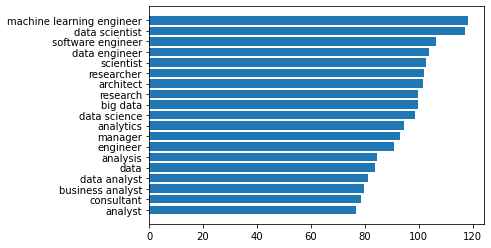

In [426]:
role_salary = pd.DataFrame(data.groupby(['role'])['salary_mean'].mean().sort_values(ascending = True)).reset_index()
plt.barh(role_salary.role, role_salary.salary_mean)

# Ordinary Least Square Regression Model

## 1. OLS Model for Data Scientist Roles

###  Data Prepration 

In [ ]:
dsdf = data[data.source == 'ds']
ds1 = dsdf[(dsdf['size'] != '-1') & (dsdf['size']!= 'Unknown')]
ds1 = ds1[ds1['state'] != 'om']
ds1['uni_bi'] = ds1['job_desc_token'] + ds1['job_desc_bigrams']


dsownerships = ds1['ownership'].value_counts().reset_index()
dsownerships_cat = dsownerships['index'].values

dssoft_list = []

for i in ds1['job_desc_token']:
    z = set(i).intersection(softskill)
    if z:
        dssoft_list.append(1)
    else:
        dssoft_list.append(0)

ds1['soft_skill'] = dssoft_list

dsownership_list = []

# 1 is private, 2 is for public, 3 is for nonprofit, 4 is for government , and 5 is for others 
private = ['Company - Private', 'Subsidiary or Business Segment','Private Practice / Firm']
public = ['Company - Public']
nonprofit = ['Nonprofit Organization','College / University', 'School / School District' ]
govern = ['Government']

for i in ds1['ownership']:
    if i in private:
        dsownership_list.append(1)
    elif i in public:
        dsownership_list.append(2)
    elif i in nonprofit:
        dsownership_list.append(3)
    elif i in govern:
        dsownership_list.append(4)
    else:
        dsownership_list.append(5)
        
ds1['ownership_cat'] = dsownership_list
ds1['ownership_cat'] = ds1['ownership_cat'].astype('category')

dsownership_dummy = pd.get_dummies(ds1['ownership_cat'])

dsownership_dummy.rename(columns = {1:'private', 2:'public', 3:'nonprofit', 4:'govern',5:'other'}, inplace = True)
ds1['size']= ds1['size'].astype('category')

dssize_dummies = pd.get_dummies(ds1['size'])


ds1['state'] = ds1['state'].astype('category')

dsstate_dummy = pd.get_dummies(ds1['state'])


dsjobprogram_list = []

for i in ds1['job_desc_token']:
    z = set(i).intersection(programming)
    if z:
        dsjobprogram_list.append(1)
    else:
        dsjobprogram_list.append(0)


ds1['program_skill'] = dsjobprogram_list

dsjobdm_list = []

for i in ds1['job_desc_token']:
    z = set(i).intersection(data_ma)
    if z:
        dsjobdm_list.append(1)
    else:
        dsjobdm_list.append(0)
        
ds1['dm_skill'] = dsjobdm_list

dsjobvisual_list = []
for i in ds1['job_desc_token']:
    z = set(i).intersection(data_visual)
    if z:
        dsjobvisual_list.append(1)
    else:
        dsjobvisual_list.append(0)
ds1['visual'] = dsjobvisual_list



dsjobmodeling_list = []
for i in ds1['job_desc_bigrams']:
    z = set(i).intersection(ml)
    if z:
        dsjobmodeling_list.append(1)
    else:
        dsjobmodeling_list.append(0)
ds1['ml'] = dsjobmodeling_list


dsdl_list = []
for i in ds1['uni_bi']:
    z = set(i).intersection(dl)
    if z:
        dsdl_list.append(1)
    else:
        dsdl_list.append(0)
ds1['dl'] = dsdl_list

### Creating Dummy Variables

In [ ]:
ds_drop = ['size','ownership_cat','ownership','state']
ds_add = [ds1, dsownership_dummy, dssize_dummies ,dsstate_dummy]
ds_final = pd.concat(ds_add, axis = 1)
ds_final = ds_final.drop(ds_drop, axis = 1)

### Model Fitting and Summary

In [ ]:
import statsmodels.api as sm

drop_dummy = ['OH', 'nonprofit', '1 to 50 employees']
ds_x = ds_final.iloc[:,20:]
dsx = ds_x.drop(drop_dummy, axis = 1)
dsx = sm.add_constant(dsx)
ds_y = ds_final['salary_mean']
dsmodel = sm.OLS(ds_y, dsx).fit()
predictions = dsmodel.predict(dsx)

In [ ]:
# Print Summary 
print(dsmodel.summary)

## 2. OLS Model for Non - Data Scientist Roles

### Data Preparation

In [ ]:
nods = data[data.source != 'ds']
nods1 = nods[(nods['size'] != '-1') & (nods['size']!= 'Unknown') & (nods['size']!= 'Company - Private')
            & (nods['size']!= 'Company - Public')]
nods1 = nods1[(nods1['state'] != 'es')]
#nods1  = nods1[nods1['state'] != 'UK']
nods1['uni_bi'] = nods1['job_desc_token'] + nods1['job_desc_bigrams']




nodsownerships =nods1['ownership'].value_counts().reset_index()
nodsownerships_cat = nodsownerships['index'].values

nodsownership_list = []


nodssoft_list = []

for i in nods1['job_desc_token']:
    z = set(i).intersection(softskill)
    if z:
        nodssoft_list.append(1)
    else:
        nodssoft_list.append(0)


nods1['soft_skill'] = nodssoft_list





# 1 is private, 2 is for public, 3 is for nonprofit, 4 is for government , and 5 is for others 
private = ['Company - Private', 'Subsidiary or Business Segment','Private Practice / Firm']
public = ['Company - Public']
nonprofit = ['Nonprofit Organization','College / University', 'School / School District' ]
govern = ['Government']

for i in nods1['ownership']:
    if i in private:
        nodsownership_list.append(1)
    elif i in public:
        nodsownership_list.append(2)
    elif i in nonprofit:
        nodsownership_list.append(3)
    elif i in govern:
        nodsownership_list.append(4)
    else:
        nodsownership_list.append(5)
        
nods1['ownership_cat'] = nodsownership_list
nods1['ownership_cat'] = nods1['ownership_cat'].astype('category')

nodsownership_dummy = pd.get_dummies(nods1['ownership_cat'])

nodsownership_dummy.rename(columns = {1:'private', 2:'public', 3:'nonprofit', 4:'govern',5:'other'}, inplace = True)
nods1['size']= nods1['size'].astype('category')

nodssize_dummies = pd.get_dummies(nods1['size'])


nods1['state'] = nods1['state'].astype('category')

nodsstate_dummy = pd.get_dummies(nods1['state'])






nodsjobprogram_list = []

for i in nods1['job_desc_token']:
    z = set(i).intersection(programming)
    if z:
        nodsjobprogram_list.append(1)
    else:
        nodsjobprogram_list.append(0)


nods1['program_skill'] = nodsjobprogram_list

nodsjobdm_list = []

for i in nods1['job_desc_token']:
    z = set(i).intersection(data_ma)
    if z:
        nodsjobdm_list.append(1)
    else:
        nodsjobdm_list.append(0)
        
nods1['dm_skill'] = nodsjobdm_list


nodsjobvisual_list = []

for i in nods1['job_desc_token']:
    z = set(i).intersection(data_visual)
    if z:
        nodsjobvisual_list.append(1)
    else:
        nodsjobvisual_list.append(0)
        
nods1['visual'] = nodsjobvisual_list



nodsml_list = []

for i in nods1['job_desc_bigrams']:
    z = set(i).intersection(ml)
    if z:
        nodsml_list.append(1)
    else:
        nodsml_list.append(0)
        
nods1['ml'] = nodsml_list


nodsdl_list = []
for i in nods1['uni_bi']:
    z = set(i).intersection(dl)
    if z:
        nodsdl_list.append(1)
    else:
        nodsdl_list.append(0)
nods1['dl'] = nodsdl_list

### Creating Dummy Variables 

In [ ]:
nods_drop = ['size','ownership_cat','ownership','state']
nods_add = [nods1, nodsownership_dummy, nodssize_dummies ,nodsstate_dummy]
nods_final = pd.concat(nods_add, axis = 1)
nods_final = nods_final.drop(nods_drop, axis = 1)

### Model Fitting and Model Summary 

In [ ]:
import statsmodels.api as sm

drop_dummy = ['OH', 'nonprofit', '10000+ employees']
nods_x = nods_final.iloc[:,20:]
nodsx = nods_x.drop(drop_dummy, axis = 1)
nodsx = sm.add_constant(nodsx)
nods_y = nods_final['salary_mean']
nodsmodel = sm.OLS(nods_y, nodsx).fit()
predictions = nodsmodel.predict(nodsx)


In [ ]:
# print summary 

print(nodsmodel.summary)